In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("viettri_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,44,17,29,2,9,4
1,3/2/2019,65,37,27,4,12,4
2,3/3/2019,81,38,2,1,1,2
3,3/4/2019,51,24,21,4,8,1
4,3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...,...
1915,5/28/2024,38,24,35,1,15,5
1916,5/29/2024,38,17,41,7,15,10
1917,5/30/2024,28,8,11,1,15,1
1918,5/31/2024,12,12,16,1,16,7


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,42.395313,22.470833,17.391667,7.528125,9.497917,3.961979
std,31.665288,16.124166,12.907283,4.971229,6.526731,2.516048
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,10.000000,8.750000,3.000000,4.000000,2.000000
50%,35.000000,20.000000,15.000000,7.000000,9.000000,4.000000
75%,59.000000,32.000000,24.000000,11.000000,14.000000,6.000000
max,178.000000,94.000000,114.000000,35.000000,27.000000,22.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,44,17
1,65,37
2,81,38
3,51,24
4,43,7
...,...,...
1915,38,24
1916,38,17
1917,28,8
1918,12,12


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)

<Axes: >

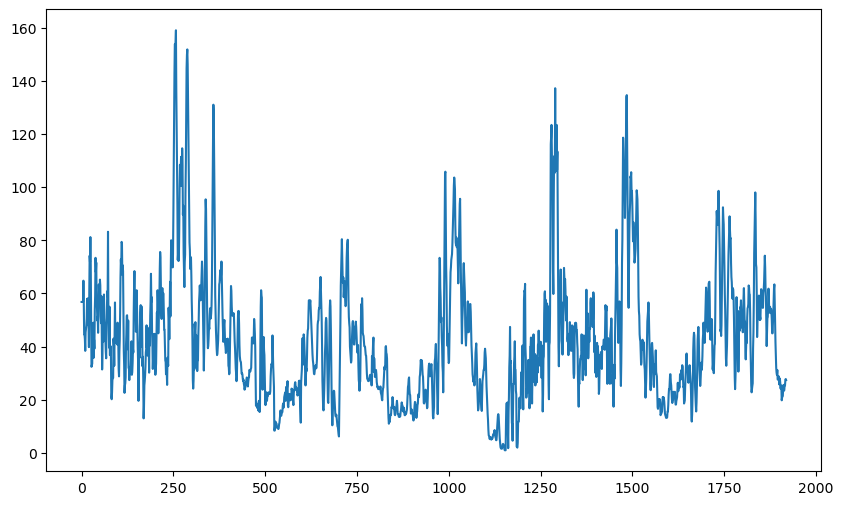

In [6]:
data['pm25'].plot(figsize=(10,6))

In [7]:
# Split the data into training, testing
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1728
Test data size: 192


In [8]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit(maxlags =15 , ic='aic')

In [9]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'pm10'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))


In [10]:
y_pred

array([[74.07001272, 45.83527221],
       [78.6538124 , 46.0931954 ],
       [81.38344912, 42.32727889],
       [76.12170854, 36.80929461],
       [67.05378273, 32.76065401],
       [61.97684628, 30.54773369],
       [56.80601174, 29.81270797],
       [53.85467652, 29.59890465],
       [53.73329328, 29.26208523],
       [53.91040033, 29.33679   ],
       [53.85810654, 29.55230007],
       [54.6370198 , 28.99579573],
       [54.70497504, 28.92295965],
       [54.65911767, 29.6731929 ],
       [55.88492981, 29.81686713],
       [56.18340483, 29.22240918],
       [56.02419716, 29.07095845],
       [55.82772833, 28.92674181],
       [55.04647531, 28.4695177 ],
       [53.59645746, 28.30906977],
       [53.02174206, 28.64993344],
       [52.57989528, 28.79338158],
       [52.28001835, 28.69669851],
       [52.54937314, 28.4816839 ],
       [52.7920144 , 28.23522058],
       [52.55790862, 27.89591458],
       [52.33728796, 27.54273286],
       [52.11302095, 27.29135904],
       [51.58516806,

In [11]:
y_pred = pd.DataFrame(y_pred, columns=['pm25', 'pm10'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [12]:
y_pred

array([[75.4565531 , 40.76513902],
       [75.4565531 , 40.76513902],
       [75.4565531 , 40.76513902],
       [75.4565531 , 40.76513902],
       [75.4565531 , 40.76513902],
       [73.03791981, 37.70763132],
       [68.66835968, 34.45153384],
       [63.16260516, 31.90585899],
       [58.68492211, 30.39641711],
       [56.05624563, 29.71164431],
       [54.43249768, 29.51255759],
       [53.99869929, 29.34917514],
       [54.168759  , 29.21398614],
       [54.35392388, 29.29620767],
       [54.74882977, 29.3922231 ],
       [55.21388943, 29.32624492],
       [55.4913249 , 29.34127746],
       [55.71587556, 29.34203389],
       [55.79334709, 29.10129885],
       [55.33565262, 28.79973938],
       [54.70332006, 28.68524423],
       [54.01445969, 28.62972886],
       [53.30491769, 28.5837202 ],
       [52.80549726, 28.58615344],
       [52.64460865, 28.5713836 ],
       [52.55184196, 28.42057983],
       [52.50332049, 28.17045009],
       [52.46992101, 27.88938219],
       [52.27708   ,

In [13]:

# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index = data.index[-1]

# # Dự đoán cho 90 ngày tiếp theo
y_next_90_days = model_fitted.forecast(data.values[-model_fitted.k_ar:], steps=90)



# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)



Predicted closing prices for the next 90 days:
[[28.50657476 17.76928009]
 [29.41383167 17.2091963 ]
 [28.66316979 17.98206206]
 [30.18558971 18.61156905]
 [32.06442003 17.58203827]
 [31.41846065 17.43001286]
 [31.51072661 17.39790642]
 [32.22052592 16.88870479]
 [31.48862724 16.57271836]
 [31.01777037 16.92645386]
 [31.74353043 16.97711707]
 [31.74056776 17.07468961]
 [31.90447487 17.16476352]
 [32.59424976 17.12849243]
 [32.625782   17.20753244]
 [32.64094914 17.28852731]
 [33.15029227 17.28097215]
 [33.15423586 17.34547276]
 [33.23879703 17.52985223]
 [33.73234707 17.46847915]
 [33.90727183 17.46233837]
 [33.8802278  17.56167217]
 [34.22209639 17.65771298]
 [34.29861503 17.66570452]
 [34.3337957  17.80425153]
 [34.57195714 17.91838035]
 [34.7773476  17.96230069]
 [34.87918755 17.99881663]
 [35.13582309 18.07108945]
 [35.28323701 18.11289356]
 [35.35027484 18.16247384]
 [35.52095729 18.2335201 ]
 [35.63707388 18.2894974 ]
 [35.72119018 18.35835193]
 [35.87011941 18.41669986]
 [36.038

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 17.351252075792427

Testing MAE: 14.5456935606189

Testing MAPE: 30.512325244485684


In [15]:
test_data.index

RangeIndex(start=1728, stop=1920, step=1)

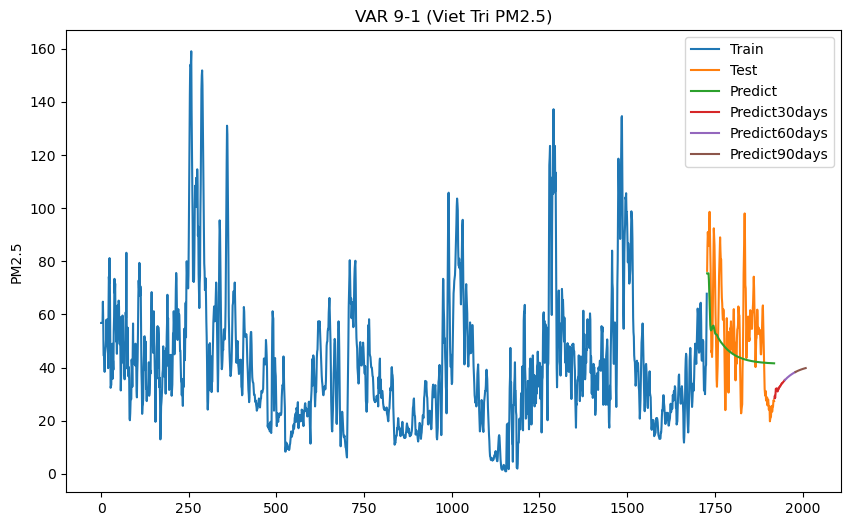

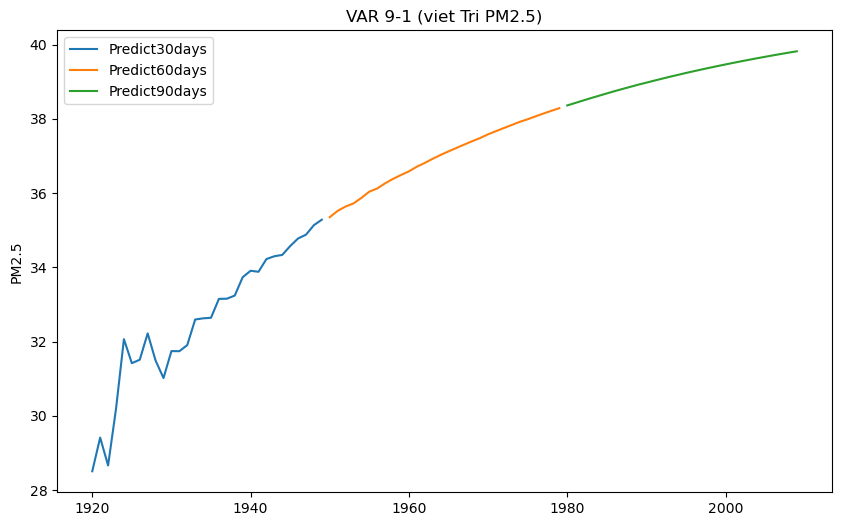

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử last_index và y_next_90_days đã được định nghĩa trước đó
# Bạn có thể thay thế chúng bằng dữ liệu thực tế của mình

# Vẽ biểu đồ huấn luyện và kiểm tra với dự đoán
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['pm25'], label='Train')
plt.plot(test_data.index, test_data['pm25'], label='Test')
plt.plot(test_data.index, y_pred[:, 0], label='Predict')

# Vẽ dự đoán 90 ngày
last_index = data.index[-1]  # Giả sử last_index là index cuối cùng của train_data

last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 9-1 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()

# Vẽ dự đoán 90 ngày với kích thước 14x7
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 9-1 (viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()
